# Medical Data Visualizer

#### Importing libraries

In [176]:
import numpy as np
import pandas as pd
import math
from urllib.request import urlretrieve 
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

import seaborn as sns
sns.set_style('darkgrid')


#### Importing our dataset

In [177]:
medical_df = pd.read_csv(r'C:\Users\loren\Desktop\Data Analysis\Medical Visualizer\medical_examination.csv')

In [178]:
medical_df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


#### Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

#### Conversion age in years and height in meters

In [179]:
medical_df.age = medical_df.age // 365

In [180]:
medical_df.height = medical_df.height / 100

In [181]:
medical_df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,1.68,62.0,110,80,1,1,0,0,1,0
1,1,55,1,1.56,85.0,140,90,3,1,0,0,1,1
2,2,51,1,1.65,64.0,130,70,3,1,0,0,0,1
3,3,48,2,1.69,82.0,150,100,1,1,0,0,1,1
4,4,47,1,1.56,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,1.68,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,1.58,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,1.83,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,1.63,72.0,135,80,1,2,0,0,0,1


#### Calculating BMI (weght/(height^2))

In [182]:
weight = medical_df.weight
height = medical_df.height

bmi = weight / (height*height)

In [183]:
bmi

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Length: 70000, dtype: float64

#### Checking if a person if overweight (BMI > 25) | NOT overweight = 0, Overweight = 1

In [184]:
overweight = []

for value in bmi:
    if value > 25:
        overweight.append('1')
    else: 
        overweight.append('0')

In [185]:
overweight

['0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0'

#### Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [186]:
medical_df['overweight'] = overweight

In [187]:
medical_df['overweight'] = medical_df['overweight'].astype(int)

In [188]:
medical_df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,50,2,1.68,62.0,110,80,1,1,0,0,1,0,0
1,1,55,1,1.56,85.0,140,90,3,1,0,0,1,1,1
2,2,51,1,1.65,64.0,130,70,3,1,0,0,0,1,0
3,3,48,2,1.69,82.0,150,100,1,1,0,0,1,1,1
4,4,47,1,1.56,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,1.68,76.0,120,80,1,1,1,0,1,0,1
69996,99995,61,1,1.58,126.0,140,90,2,2,0,0,1,1,1
69997,99996,52,2,1.83,105.0,180,90,3,1,0,1,0,1,1
69998,99998,61,1,1.63,72.0,135,80,1,2,0,0,0,1,1


#### Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [189]:
medical_df['gluc'] = medical_df['gluc'].replace(1, 0)

In [190]:
medical_df['gluc'] = medical_df['gluc'].replace([2,3], 1)

In [191]:
medical_df.gluc.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: gluc, dtype: int64

In [192]:
medical_df['cholesterol'] = medical_df['cholesterol'].replace(1, 0)

In [193]:
medical_df['cholesterol'] = medical_df['cholesterol'].replace([2,3], 1)

In [194]:
medical_df.cholesterol.head(10)

0    0
1    1
2    1
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: cholesterol, dtype: int64

In [195]:
medical_df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,50,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,55,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,51,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,48,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,47,1,1.56,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,1.68,76.0,120,80,0,0,1,0,1,0,1
69996,99995,61,1,1.58,126.0,140,90,1,1,0,0,1,1,1
69997,99996,52,2,1.83,105.0,180,90,1,0,0,1,0,1,1
69998,99998,61,1,1.63,72.0,135,80,0,1,0,0,0,1,1


#### Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.

In [196]:
medical_df_long = pd.melt(medical_df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

In [197]:
medical_df_long

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


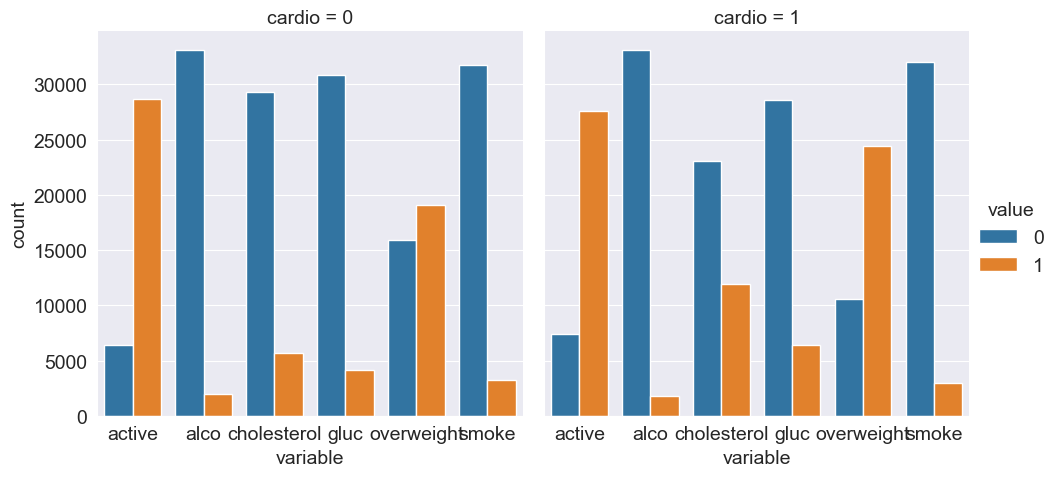

In [198]:
sns.catplot(data=medical_df_long, x='variable', kind='count', col='cardio', hue='value');

#### Clean the data. Filter out the following patient segments that represent incorrect data:
* diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
* height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
* height is more than the 97.5th percentile
* weight is less than the 2.5th percentile
* weight is more than the 97.5th percentile

#### diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))

In [199]:
medical_df = medical_df[medical_df['ap_lo'] <= medical_df['ap_hi']]

In [200]:
medical_df.ap_lo.unique()

array([ 80,  90,  70, 100,  60,  85,  89, 110,  65,  63,  79, 120,  50,
        30, 109,  84,  91,  40,  73,  78,  75,  86,  87,  82,  95,  69,
        74,  97,  81,  83, 119,   0,  93, 105,  99,  77,  59,  92, 108,
       115,  68,  61, 106, 102,  94,  66,  52, 170,  76, 160,  62,  96,
       113, 130,  67,  10,  88,   8, 112, 104,  71,  72,  98,  20,  57,
       101,  64, 140,  45,  58, 126,   7, 103, 150, 121,   6, 114,  53,
       111,   1, 118,  56, 182,   9, 180, 107,  55, 122,  15, -70, 125,
        54,  49], dtype=int64)

#### height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))


In [201]:
medical_df = medical_df[medical_df['height'] >= medical_df['height'].quantile(0.025)]

In [202]:
medical_df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,50,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,55,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,51,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,48,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,47,1,1.56,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,1.68,76.0,120,80,0,0,1,0,1,0,1
69996,99995,61,1,1.58,126.0,140,90,1,1,0,0,1,1,1
69997,99996,52,2,1.83,105.0,180,90,1,0,0,1,0,1,1
69998,99998,61,1,1.63,72.0,135,80,0,1,0,0,0,1,1


#### height is more than the 97.5th percentile

In [203]:
medical_df = medical_df[medical_df['height'] < medical_df['height'].quantile(0.975)]

In [204]:
medical_df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,50,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,55,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,51,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,48,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,47,1,1.56,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,57,1,1.65,80.0,150,80,0,0,0,0,1,1,1
69995,99993,52,2,1.68,76.0,120,80,0,0,1,0,1,0,1
69996,99995,61,1,1.58,126.0,140,90,1,1,0,0,1,1,1
69998,99998,61,1,1.63,72.0,135,80,0,1,0,0,0,1,1


#### weight is less than the 2.5th percentile

In [205]:
medical_df = medical_df[medical_df['weight'] > medical_df['weight'].quantile(0.025)]

In [206]:
medical_df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,50,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,55,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,51,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,48,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,47,1,1.56,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,57,1,1.65,80.0,150,80,0,0,0,0,1,1,1
69995,99993,52,2,1.68,76.0,120,80,0,0,1,0,1,0,1
69996,99995,61,1,1.58,126.0,140,90,1,1,0,0,1,1,1
69998,99998,61,1,1.63,72.0,135,80,0,1,0,0,0,1,1


#### weight is more than the 97.5th percentile

In [207]:
medical_df = medical_df[medical_df['weight'] < medical_df['weight'].quantile(0.975)]

In [208]:
medical_df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,50,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,55,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,51,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,48,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,47,1,1.56,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,53,1,1.72,70.0,130,90,0,0,0,0,1,1,0
69994,99992,57,1,1.65,80.0,150,80,0,0,0,0,1,1,1
69995,99993,52,2,1.68,76.0,120,80,0,0,1,0,1,0,1
69998,99998,61,1,1.63,72.0,135,80,0,1,0,0,0,1,1


#### Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. 

In [215]:
corr_matrix = round(medical_df.corr(), 1)

In [216]:
corr_matrix

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0
age,0.0,1.0,-0.0,-0.1,0.1,0.0,0.2,0.1,0.1,-0.0,-0.0,-0.0,0.2,0.1
sex,0.0,-0.0,1.0,0.5,0.1,0.0,0.1,-0.0,-0.0,0.3,0.2,0.0,0.0,-0.1
height,0.0,-0.1,0.5,1.0,0.2,0.0,0.0,-0.1,-0.0,0.2,0.1,-0.0,-0.0,-0.2
weight,0.0,0.1,0.1,0.2,1.0,0.0,0.2,0.1,0.1,0.1,0.1,-0.0,0.2,0.7
ap_hi,0.0,0.0,0.0,0.0,0.0,1.0,0.1,0.0,0.0,-0.0,0.0,-0.0,0.1,0.0
ap_lo,0.0,0.2,0.1,0.0,0.2,0.1,1.0,0.1,0.1,0.0,0.0,0.0,0.3,0.2
cholesterol,0.0,0.1,-0.0,-0.1,0.1,0.0,0.1,1.0,0.4,0.0,0.0,0.0,0.2,0.1
gluc,0.0,0.1,-0.0,-0.0,0.1,0.0,0.1,0.4,1.0,-0.0,0.0,-0.0,0.1,0.1
smoke,-0.0,-0.0,0.3,0.2,0.1,-0.0,0.0,0.0,-0.0,1.0,0.3,0.0,-0.0,-0.0


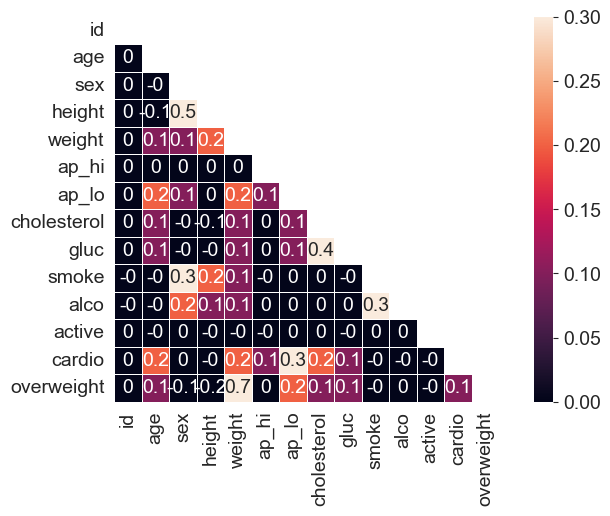

In [226]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig = sns.heatmap(corr_matrix,vmin=0,vmax=.30,square=True,annot=True,linewidths=.5,mask=mask)
